# Run linear fitting

## key imports

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

from matplotlib import rc
from numpy import array
import matplotlib.lines as mlines
from itertools import islice
import csv
import pandas as pd

## Constants

In [2]:
P = 4.25 # power
P_err = 4.25 * 0.01 # error on the power supply
A = 0.015*0.015 # cross sectional area of samples and thermistors

M1 = True # Run method 1 if True

## Function

In [3]:
def func(x, k, b):
    return k * x + b

## read csv file with saved DT, thickness and error

In [6]:
cols = ['Thickness', 'DeltaT', 'Error']

df = pd.read_csv('/Users/wei/In_plane_2.csv', header=None, names=cols)

y = np.array(df['DeltaT'])
yerr = np.array(df['Error'])
yerrs_inv = 1.0/yerr
x = np.array(df['Thickness'])

# xdata = np.array([10,36])
# x = 0.001 * xdata
# y = np.array([1.65980, 2.61508])
# yerrs = np.array([0.07900646, 0.10100583])

## Method 1 - use y error

## Apply fitting, obtain parameters and corresponding error 

In [7]:
if M1:
    para, cov = curve_fit(func, x, y, sigma = yerrs, absolute_sigma = True)
    para_err = np.sqrt(np.diag(cov))

## Method 2 - use inverse y error

In [ ]:
if not M1:
    para, cov = np.polyfit(x, y, 1, full=False, w=yerrs_inv, cov='unscaled')
    para_err = np.sqrt(np.diag(cov))


## Calculate TC and its error

In [8]:
TC = 1.0/para[0]*P/A
TC_err = math.sqrt(P**2/(A**2 * para[0]**4)*para_err[0]**2 + 1.0/(para[0]**2 * A**2) * P_err**2)

## Plot

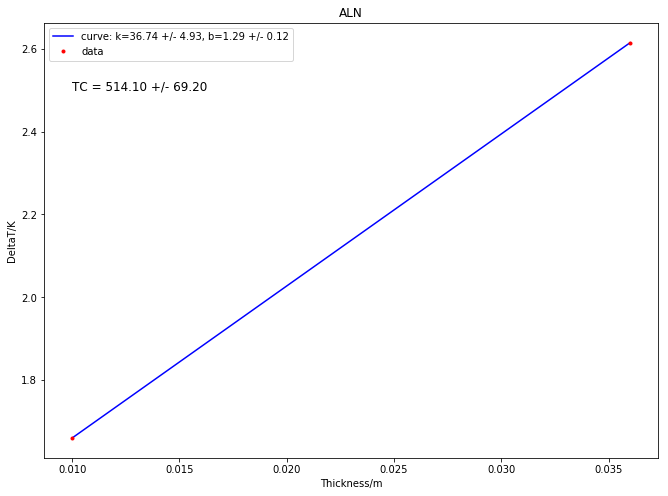

In [21]:
fig = plt.figure(figsize=(11,8))
plt.plot(x, func(x, *para), 'b-', label='curve: k={:.2f} +/- {:.2f}, b={:.2f} +/- {:.2f}'.format(para[0],para_err[0],para[1],para_err[1]))
plt.plot(x, y, '.r', label='data')
plt.xlabel('Thickness/m')
plt.ylabel('DeltaT/K')
plt.title('ALN')
plt.legend()
plt.text(0.01,2.5,'TC = {:.2f} +/- {:.2f}'.format(TC, TC_err), size=12)
plt.show()
fig.savefig('/Users/wei/Desktop/ALN.png')